In [ ]:
import numpy as np
import pandas as pd

import os

github_repo_url = 'https://github.com/HamzahShafa5317/SusuScanner'
clone_dir = '/content/SusuScanner'


if not os.path.exists(clone_dir):
    !git clone {github_repo_url} {clone_dir}
else:
    print(f"Repository already cloned to {clone_dir}")


data_dir = os.path.join(clone_dir, 'data gambar')
data_train = os.path.join(data_dir, 'train')
data_test = os.path.join(data_dir, 'test')

if not os.path.exists(data_train):
    print(f"Error: Training data directory not found at {data_train}")
if not os.path.exists(data_test):
    print(f"Error: Test data directory not found at {data_test}")

Cloning into '/content/SusuScanner'...
remote: Enumerating objects: 366, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 366 (delta 44), reused 4 (delta 4), pack-reused 282 (from 1)
Receiving objects: 100% (366/366), 5.16 MiB | 28.56 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Error: Training data directory not found at /content/SusuScanner/data gambar/train
Error: Test data directory not found at /content/SusuScanner/data gambar/test


In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

data_train = "/content/SusuScanner/image/train"
data_test = "/content/SusuScanner/image/test"

#preproccesing
def convert_df(dataset, sample_size=None):
    img_dir = Path(dataset)
    filenames = list(img_dir.rglob('*.jpg'))
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filenames))
    if len(filenames) == 0:
        raise ValueError(f"No images found in the directory {dataset}")
    if sample_size:
        sample_indices = np.random.choice(len(filenames), sample_size, replace=False)
        filenames = [filenames[i] for i in sample_indices]
        labels = [labels[i] for i in sample_indices]
    filenames = pd.Series(filenames, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filenames, labels], axis=1)
    return image_df


In [ ]:

sample_size = 300  # Adjust this size as needed
image_train = convert_df(data_train, sample_size)
image_test = convert_df(data_test, sample_size)

In [ ]:
def extract_hog_features(image_paths, img_size=(128, 128)):
    hog_features = []
    for img_path in image_paths:
        image = imread(img_path)
        image_resized = resize(image, img_size)  # Resize image
        image_gray = rgb2gray(image_resized)
        features = hog(image_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    if len(hog_features) == 0:
        raise ValueError("No HOG features extracted. Check if the images are being loaded correctly.")
    return np.array(hog_features)

# --- Ekstraksi Fitur HOG ---
X_train_hog = extract_hog_features(image_train['Filepath'])
X_test_hog = extract_hog_features(image_test['Filepath'])


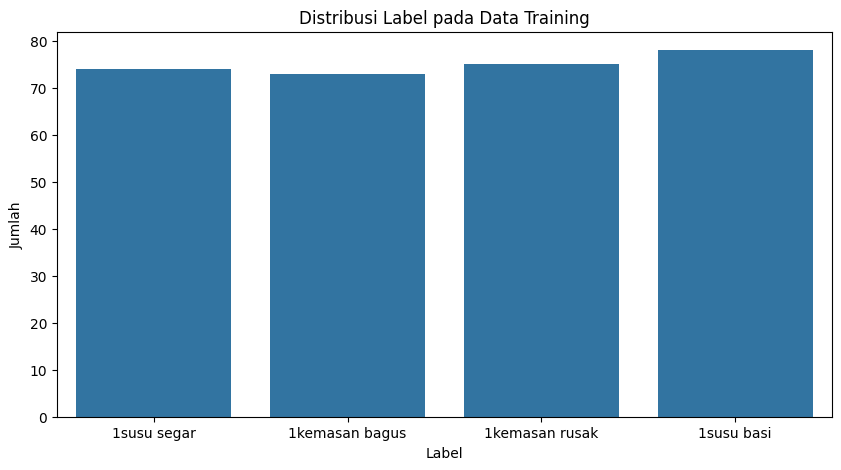


Statistik Deskriptif Fitur HOG:
             0           1           2           3           4           5     \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     0.134701    0.064245    0.067036    0.074184    0.138808    0.041615   
std      0.131905    0.094945    0.095488    0.110198    0.135710    0.064829   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001336    0.000000    0.000000    0.000000    0.002174    0.000000   
50%      0.087943    0.017215    0.024332    0.013722    0.097577    0.005480   
75%      0.238053    0.088844    0.085027    0.095378    0.262597    0.059310   
max      0.501435    0.367714    0.417573    0.377991    0.443416    0.309936   

             6           7           8           9     ...        8090  \
count  300.000000  300.000000  300.000000  300.000000  ...  300.000000   
mean     0.045596    0.052039    0.080280    0.191666  ...    0.120950   
std      0.0759

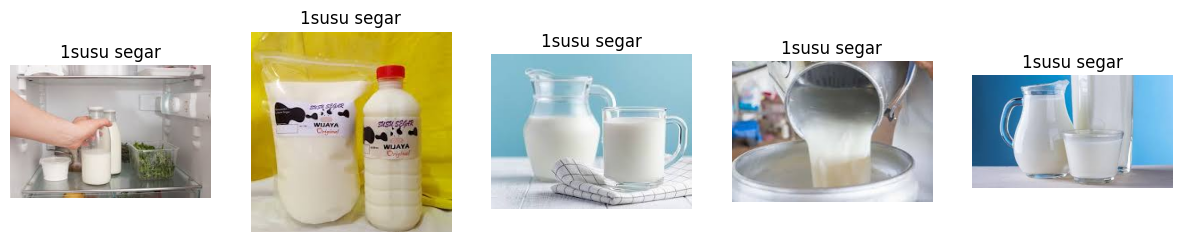

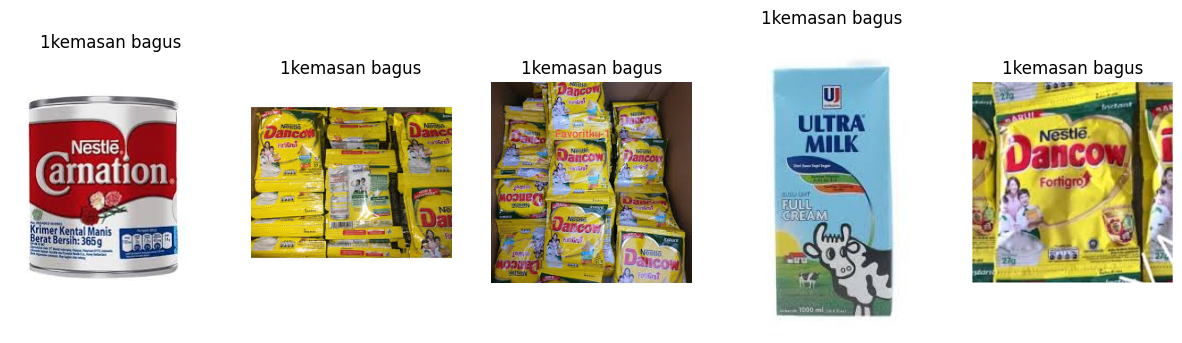

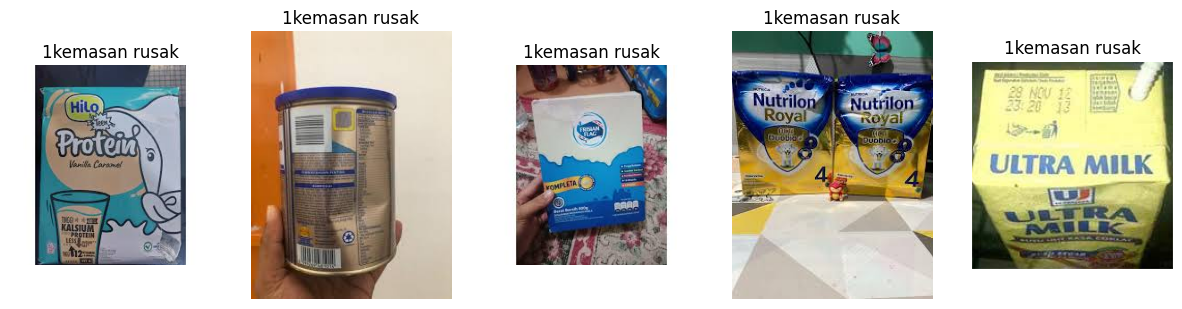

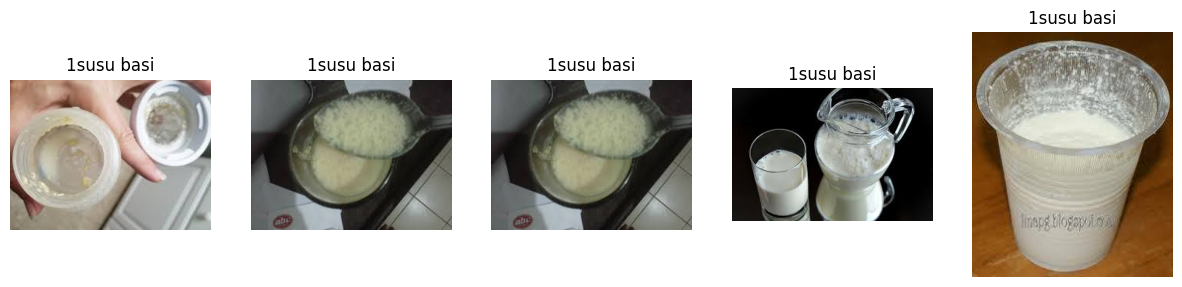


Visualisasi Gambar per Kelas (Test Set):


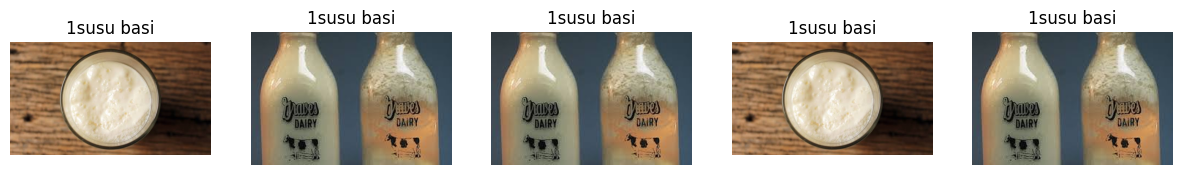

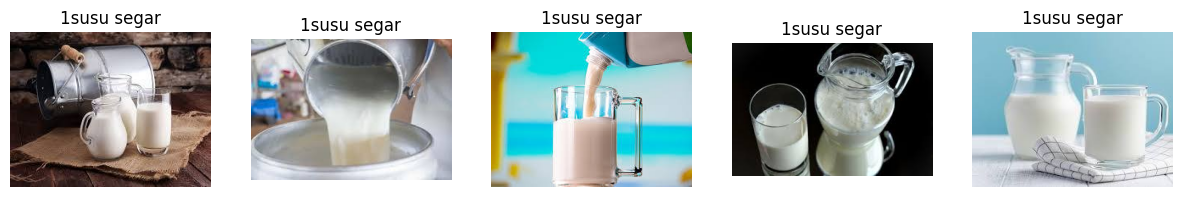

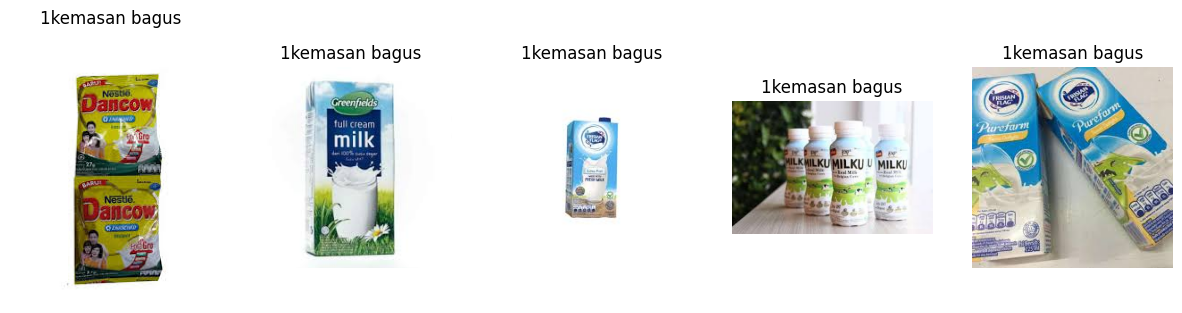

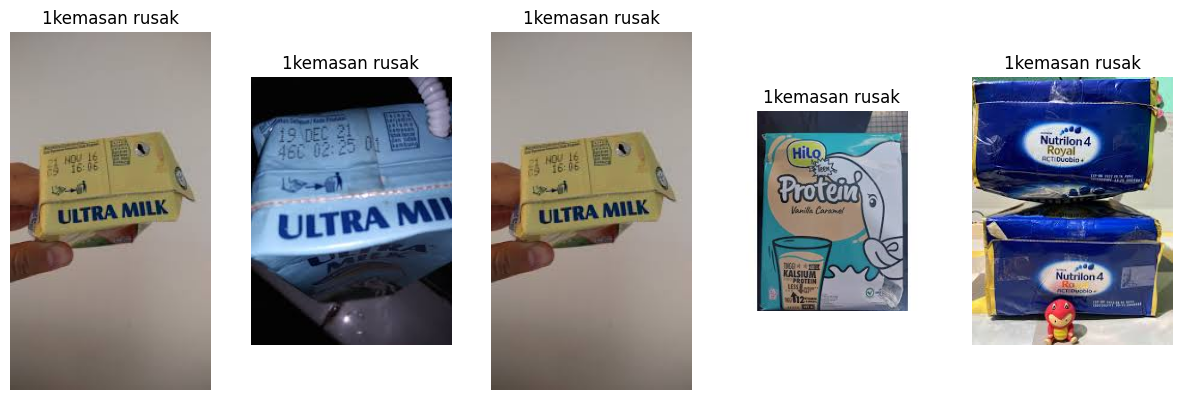

In [ ]:
#EDA
# 1. Distribusi Label
plt.figure(figsize=(10, 5))
sns.countplot(x='Label', data=image_train)
plt.title('Distribusi Label pada Data Training')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# 2. Statistik Deskriptif Fitur HOG
hog_features_df = pd.DataFrame(X_train_hog)
print("\nStatistik Deskriptif Fitur HOG:")
print(hog_features_df.describe())

# 3. Visualisasi Gambar per Kelas
def visualize_images_per_class(image_df, num_images=5):
    unique_labels = image_df['Label'].unique()
    for label in unique_labels:
        subset = image_df[image_df['Label'] == label].sample(num_images)
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
        for i, ax in enumerate(axes.flat):
            img = imread(subset['Filepath'].iloc[i])
            ax.imshow(img)
            ax.set_title(label)
            ax.axis('off')
        plt.show()

print("\nVisualisasi Gambar per Kelas (Training Set):")
visualize_images_per_class(image_train)

print("\nVisualisasi Gambar per Kelas (Test Set):")
visualize_images_per_class(image_test)

In [ ]:

sample_size = 300
image_train = convert_df(data_train, sample_size)
image_test = convert_df(data_test, sample_size)

def extract_hog_features(image_paths, img_size=(128, 128)):
    hog_features = []
    for img_path in image_paths:
        image = imread(img_path)
        image_resized = resize(image, img_size)  # Resize image
        image_gray = rgb2gray(image_resized)
        features = hog(image_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    if len(hog_features) == 0:
        raise ValueError("No HOG features extracted. Check if the images are being loaded correctly.")
    return np.array(hog_features)

X_train_hog = extract_hog_features(image_train['Filepath'])
X_test_hog = extract_hog_features(image_test['Filepath'])

# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(image_train['Label'])
y_test_encoded = le.transform(image_test['Label'])


X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_hog, y_train_encoded, test_size=0.2, random_state=42)

# Normalisasi fitur HOG after splitting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)
X_test_scaled = scaler.transform(X_test_hog)

y_train = y_train_split
y_val = y_val_split
y_test = y_test_encoded

In [ ]:
# Normalisasi fitur HOG after splitting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)
X_test_scaled = scaler.transform(X_test_hog)

# Inisiasi model SVM untuk RFE
svm_model_rfe = SVC(kernel='linear', C=1)

num_features = 50
rfe_selector = RFE(estimator=svm_model_rfe, n_features_to_select=num_features, step=1)
rfe_selector.fit(X_train_split, y_train)


selected_features = rfe_selector.support_

X_train_selected = X_train_split[:, selected_features]
X_test_selected = X_test_hog[:, selected_features]


svm_model_final = SVC(kernel='linear', C=1)
svm_model_final.fit(X_train_selected, y_train)

SVC(C=1, kernel='linear')

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Akurasi: {svm_acc:.4f}")
print(classification_report(y_test, svm_pred))

SVM Akurasi: 0.9467
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.96      1.00      0.98        78
           2       0.97      0.87      0.91        68
           3       0.90      0.94      0.92        78

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



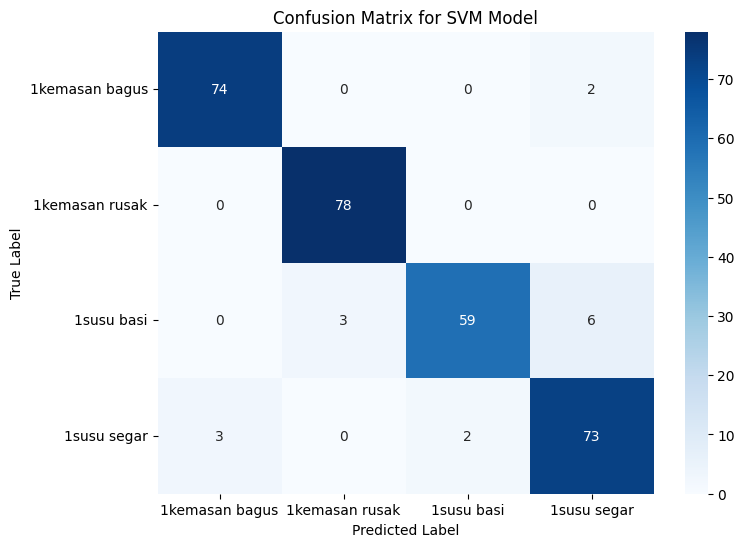

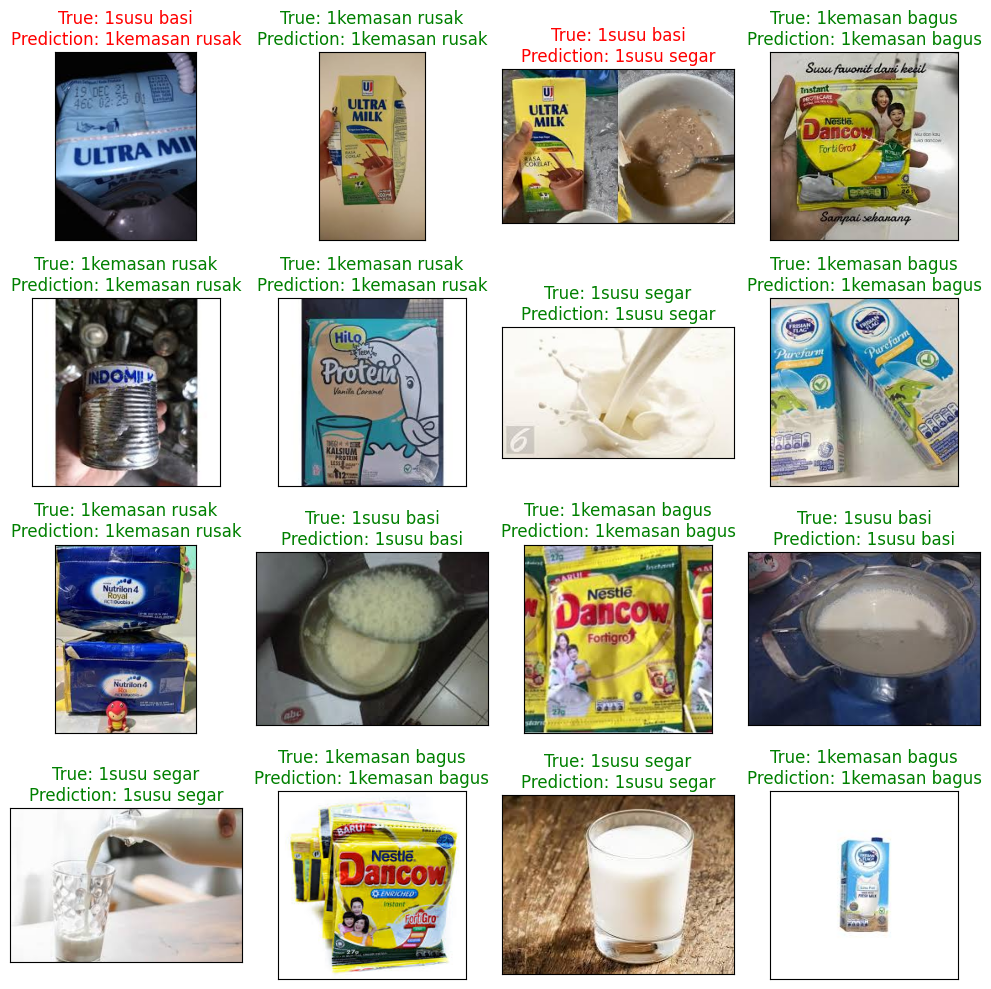

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread


cm_svm = confusion_matrix(y_test, svm_pred)


target_names = ['1kemasan bagus', '1kemasan rusak', '1susu basi', '1susu segar']


plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

random_index = np.random.randint(0, len(image_test), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

y_test_labels = [target_names[i] for i in y_test]
svm_pred_labels = [target_names[i] for i in svm_pred]

for i, ax in enumerate(axes.flat):
    img = imread(image_test['Filepath'].iloc[random_index[i]])
    ax.imshow(img)
    true_label = y_test_labels[random_index[i]]
    pred_label = svm_pred_labels[random_index[i]]
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}\nPrediction: {pred_label}', color=color)

plt.tight_layout()
plt.show()

In [ ]:
import joblib


joblib.dump(svm_model, 'model_susu_hog.pkl')

['model_susu.pkl']

In [ ]:
from google.colab import files
files.download('model_susu_hog.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>